In [25]:
# Importando as bibliotecas
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import os

In [26]:
# Carregando a base de dados
df = pd.read_csv('KmXViagens.csv', sep=';')

In [27]:
df.head(15)

,ANO,KM,Viagens
0,2007,4,138163
1,2010,58,145813
2,2011,74,147923
3,2012,84,149242
4,2013,91,150165
5,2014,242,170080
6,2015,380,188280
7,2016,500,204106
8,2017,503,204502
9,2018,504,204634


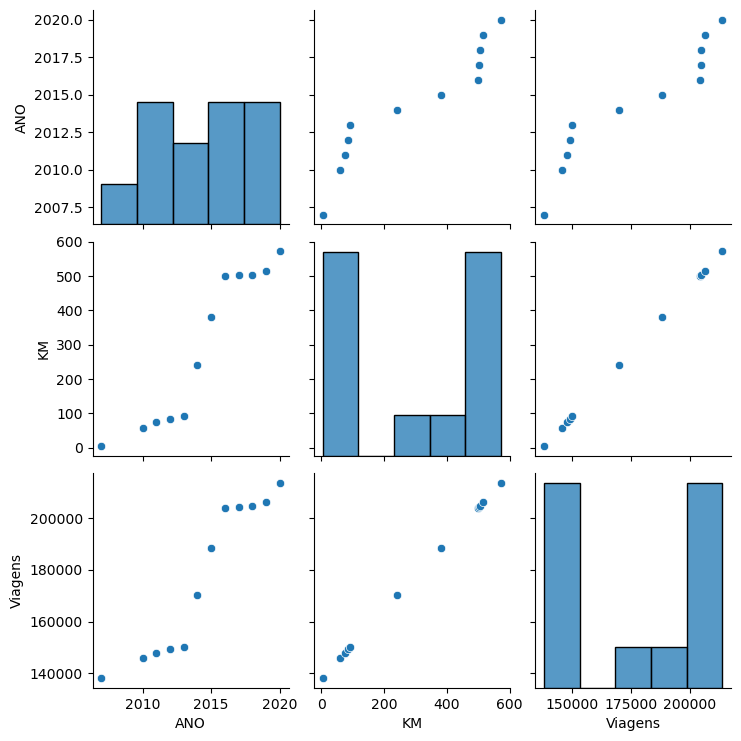

In [28]:
# GRÁFICO DE CORRELAÇÃO
sns.pairplot(df)

In [29]:
correlacoes = df.corr(method='pearson')
correlacoes

,ANO,KM,Viagens
ANO,1.000000,0.942702,0.943747
KM,0.942702,1.000000,0.999989
Viagens,0.943747,0.999989,1.000000


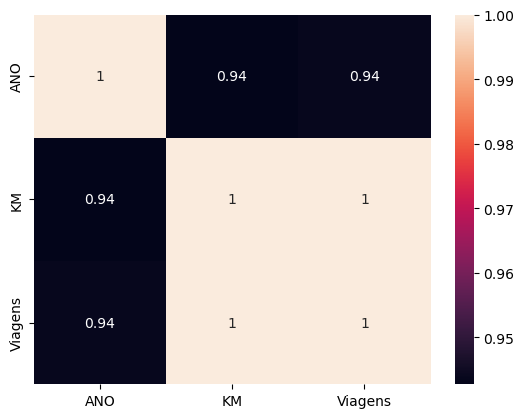

In [36]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

In [30]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [31]:
regressao = smf.ols('Viagens ~ KM', data = df).fit()

In [32]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                Viagens   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.460e+05
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.39e-24
Time:                        22:02:01   Log-Likelihood:                -75.695
No. Observations:                  12   AIC:                             155.4
Df Residuals:                      10   BIC:                             156.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.38e+05     71.763   1923.481      0.0

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [33]:
coefs = pd.DataFrame(regressao.params)
coefs.columns = ['Coeficientes']
print(coefs)

            Coeficientes
Intercept  138035.636266
KM            132.173573


In [34]:
regressao.predict()

array([138564.33055756, 145701.70348822, 147816.48065286, 149138.21638076,
       150063.43139029, 170021.64088159, 188261.59392661, 204122.42266141,
       204518.94337978, 204651.11695257, 206237.19982605, 213638.91990229])

In [35]:
x = 1800  # Substitua pelo valor real de KM de ciclovia em 2028
previsao = regressao.predict({'KM': x})

print("Previsão do Número de Viagens em 2028:", previsao[0])

Previsão do Número de Viagens em 2028: 375948.0672884402
